# <font color='Blue'> The Iris Project </font>

## <font color='Blue'> Author Details </font>

In [1]:
from datetime import datetime

current_date_and_time = datetime.now()
date_and_time_in_text = current_date_and_time.strftime('%d/%m/%Y')

print('Created the day: ', date_and_time_in_text)
print('Author: Dr. Marcos A. Albarracin Manrique') 

Created the day:  12/09/2024
Author: Dr. Marcos A. Albarracin Manrique


## <font color='blue'> Description </font>

> The Iris dataset was used in Fisher's classic 1936 paper: The Use of Multiple Measures in Taxonomic Problems. It includes three iris species with 50 samples each, as well as some properties about each flower. One flower species is linearly separable from the other two, but the other two are not linearly separable from each other. The purpose of the repository is to show the study done on the dataset, training and evaluation of the results of the predictive model. 

> References:

1. https://www.kaggle.com/uciml/iris

2. https://archive.ics.uci.edu/dataset/53/iris

3. https://en.wikipedia.org/wiki/Iris_flower_data_set

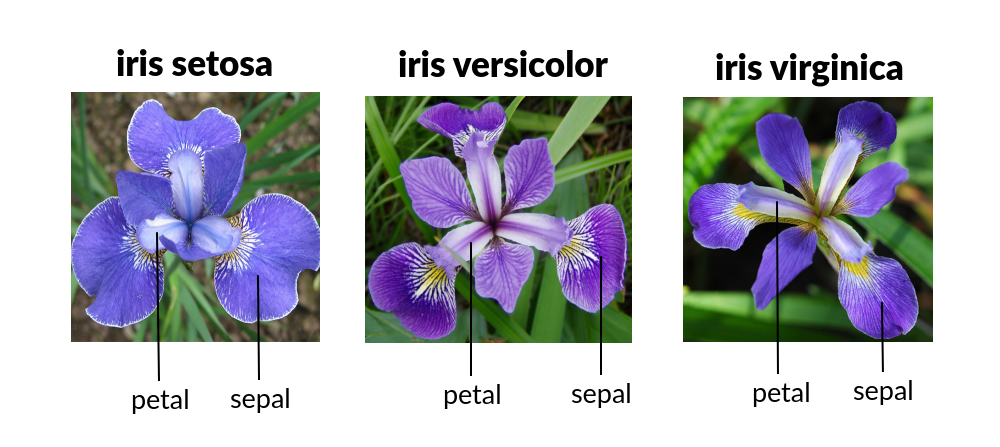

- **This Dataset contains data about different plants, specifically it contains:**
1. Sepal length in cm
2. Sepal width in cm
3. Petal length in cm
4. Petal width in cm

Which are going to be our features. 

- **As a target, the dataset indicates to which of 3 different plant families this plant belongs to. This categories are:**

1. Iris Setosa
2. Iris Versicolour
3. Iris Virginica

## <font color='blue'> Data Exploration and Analysis </font>

### <font color='blue'> Loading the Required Packages </font>

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes = True)
#sns.set(style = 'whitegrid') 
%matplotlib inline

from scipy import stats, integrate
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
pd.options.display.float_format = '{:.2f}'.format
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

In [5]:
print(np.__version__)
print(pd.__version__)
print(sns.__version__)
import sys
print(sys.version)

1.26.4
1.3.5
0.13.2
3.10.12 (main, Jul 29 2024, 16:56:48) [GCC 11.4.0]


## <font color='blue'> Reading Iris Data from Computer</font>
This is one way to obtain data from directory in your computer. 

In [6]:
iris = pd.read_csv('datas/iris.data')

In [7]:
iris.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.90,3.00,1.40,0.20,Iris-setosa
1,4.70,3.20,1.30,0.20,Iris-setosa
2,4.60,3.10,1.50,0.20,Iris-setosa
3,5.00,3.60,1.40,0.20,Iris-setosa
4,5.40,3.90,1.70,0.40,Iris-setosa


- **Putting generic column names instead of the first row of data.**

In [8]:
iris = pd.read_csv('datas/iris.data', header = None)
iris.head()

,0,1,2,3,4
0,5.10,3.50,1.40,0.20,Iris-setosa
1,4.90,3.00,1.40,0.20,Iris-setosa
2,4.70,3.20,1.30,0.20,Iris-setosa
3,4.60,3.10,1.50,0.20,Iris-setosa
4,5.00,3.60,1.40,0.20,Iris-setosa


- **Putting correct names to the columns.**

In [9]:
col_name = ['sepal length', 'sepal width', 'petal length', 'petal width', 'class']

In [10]:
iris.columns = col_name

In [11]:
iris.head()

,sepal length,sepal width,petal length,petal width,class
0,5.10,3.50,1.40,0.20,Iris-setosa
1,4.90,3.00,1.40,0.20,Iris-setosa
2,4.70,3.20,1.30,0.20,Iris-setosa
3,4.60,3.10,1.50,0.20,Iris-setosa
4,5.00,3.60,1.40,0.20,Iris-setosa


## <font color='blue'> Reading Iris Data from Seaborn </font>

In [12]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.10,3.50,1.40,0.20,setosa
1,4.90,3.00,1.40,0.20,setosa
2,4.70,3.20,1.30,0.20,setosa
3,4.60,3.10,1.50,0.20,setosa
4,5.00,3.60,1.40,0.20,setosa


In [13]:
# Copy of iris dataset
iris_data_set = df

In [14]:
# Descriptive statistics 
iris.describe()

,sepal length,sepal width,petal length,petal width
count,150.00,150.00,150.00,150.00
mean,5.84,3.05,3.76,1.20
std,0.83,0.43,1.76,0.76
min,4.30,2.00,1.00,0.10
25%,5.10,2.80,1.60,0.30
50%,5.80,3.00,4.35,1.30
75%,6.40,3.30,5.10,1.80
max,7.90,4.40,6.90,2.50


In [15]:
# Descriptive statistics 
df_summary = iris_data_set.describe()
df_summary

,sepal_length,sepal_width,petal_length,petal_width
count,150.00,150.00,150.00,150.00
mean,5.84,3.06,3.76,1.20
std,0.83,0.44,1.77,0.76
min,4.30,2.00,1.00,0.10
25%,5.10,2.80,1.60,0.30
50%,5.80,3.00,4.35,1.30
75%,6.40,3.30,5.10,1.80
max,7.90,4.40,6.90,2.50


In [17]:
print(iris_data_set.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


In [18]:
print(iris_data_set.groupby('species').size())

species
setosa        50
versicolor    50
virginica     50
dtype: int64


## <font color='blue'> Statistics Visualization </font>

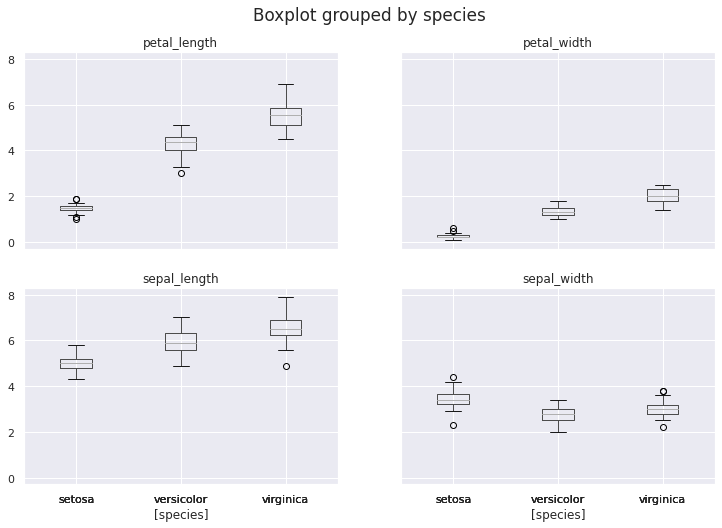

In [25]:
iris_data_set.boxplot(by = 'species', figsize = (12,8));

> From the boxplot below, it is visible that only sepal width is having the outlier, whereas sepal length, petal length, petal width having datapoints within min and maxrange.

> It is visible that values in sepal length and sepal width are tightly distributed and IQ range is small, whereas in petal length and petal width the values are distibuted widely, so IQ range are high.

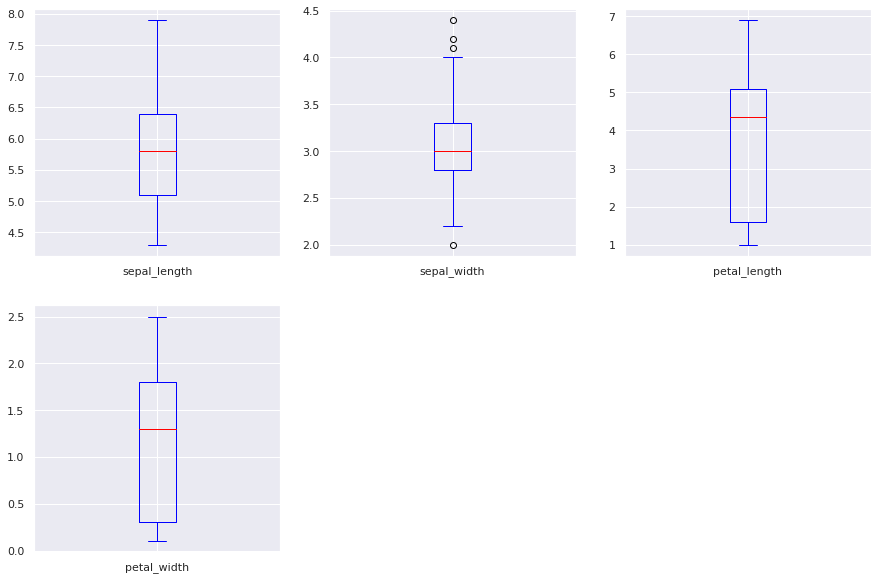

In [29]:
boxplot = iris_data_set.plot(kind = 'box', subplots = True, layout = (2, 3), sharex = False, sharey = False, colormap = 'bwr', figsize = (15,10))

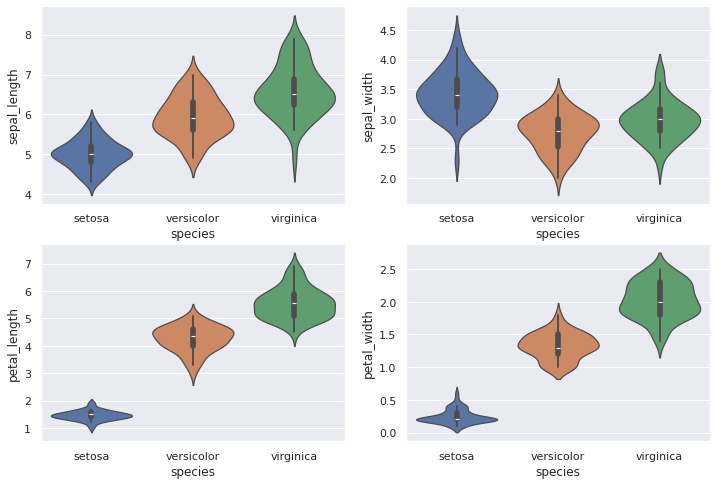

In [26]:
plt.figure(figsize = (12,8));
plt.subplot(2,2,1)
sns.violinplot(x = 'species', y = 'sepal_length', data = iris_data_set, hue = 'species')
plt.subplot(2,2,2)
sns.violinplot(x = 'species', y = 'sepal_width', data = iris_data_set, hue = 'species')
plt.subplot(2,2,3)
sns.violinplot(x = 'species', y = 'petal_length', data = iris_data_set, hue = 'species')
plt.subplot(2,2,4)
sns.violinplot(x = 'species', y = 'petal_width', data = iris_data_set, hue = 'species');

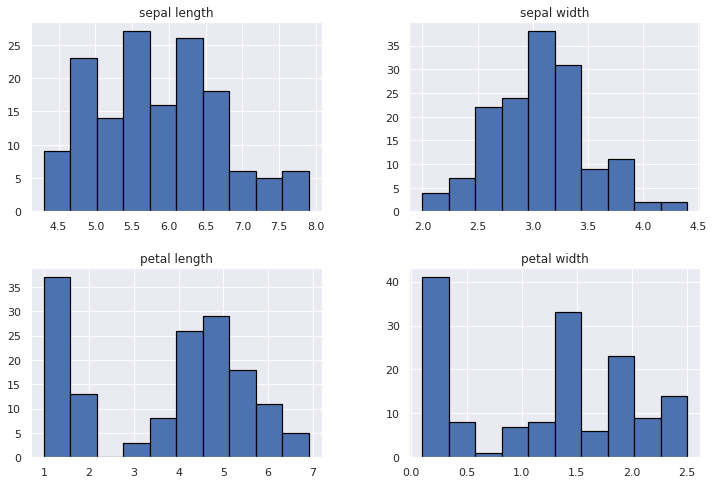

In [22]:
iris.hist(edgecolor = 'black', linewidth = 1.2, figsize = (12,8));
plt.show();

> From correlation matrix and scatterplot, both below, it is clear that independent variable petal length and petal width are positively and strongly correlated to sepal length. Whereas sepal width is negatively and weakly correlated to sepal length. It also provide the insight of multicollinearity between the variable petal length and petal width.

In [31]:
# Correlation Matrix for Iris_dataset
iris_data_set.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.00,-0.12,0.87,0.82
sepal_width,-0.12,1.00,-0.43,-0.37
petal_length,0.87,-0.43,1.00,0.96
petal_width,0.82,-0.37,0.96,1.00


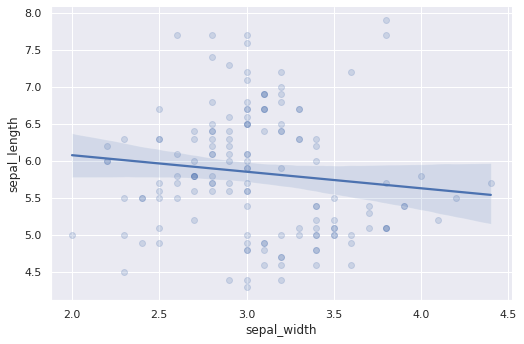

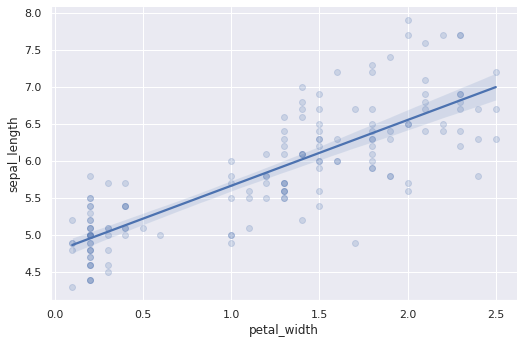

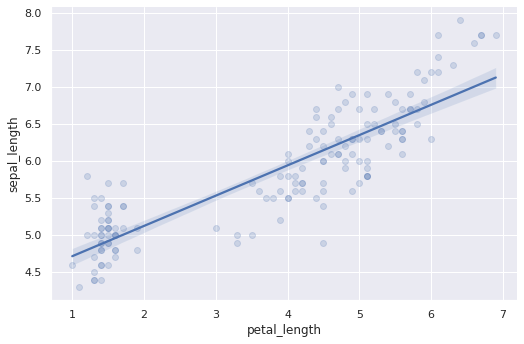

In [35]:
# Scatterplot with best fit line to explore relation between sepal length (dependent variable) and sepal width, petal width, petal lengh(Independent variable)
a=sns.lmplot(x = 'sepal_width', y = 'sepal_length', data = iris_data_set, aspect = 1.5, scatter_kws = {'alpha':0.2})
b=sns.lmplot(x = 'petal_width', y = 'sepal_length', data = iris_data_set, aspect = 1.5, scatter_kws = {'alpha':0.2})
c=sns.lmplot(x = 'petal_length', y = 'sepal_length', data = iris_data_set, aspect = 1.5, scatter_kws = {'alpha':0.2})  

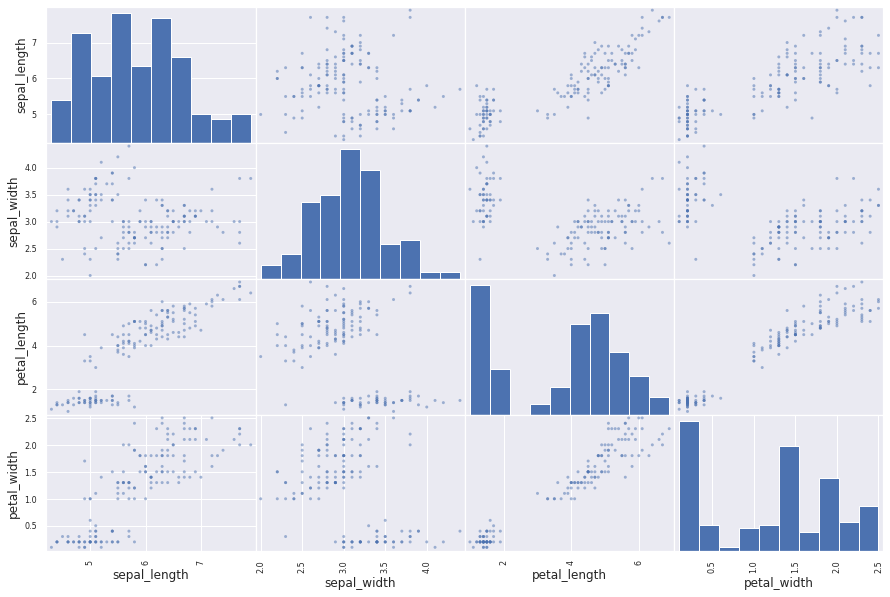

In [36]:
#Combine scatterplot to explore relation bbetween sepallength, sepalwidth, petalwidth, petallength
scatter = pd.plotting.scatter_matrix(iris_data_set, figsize = (15,10))
plt.show()

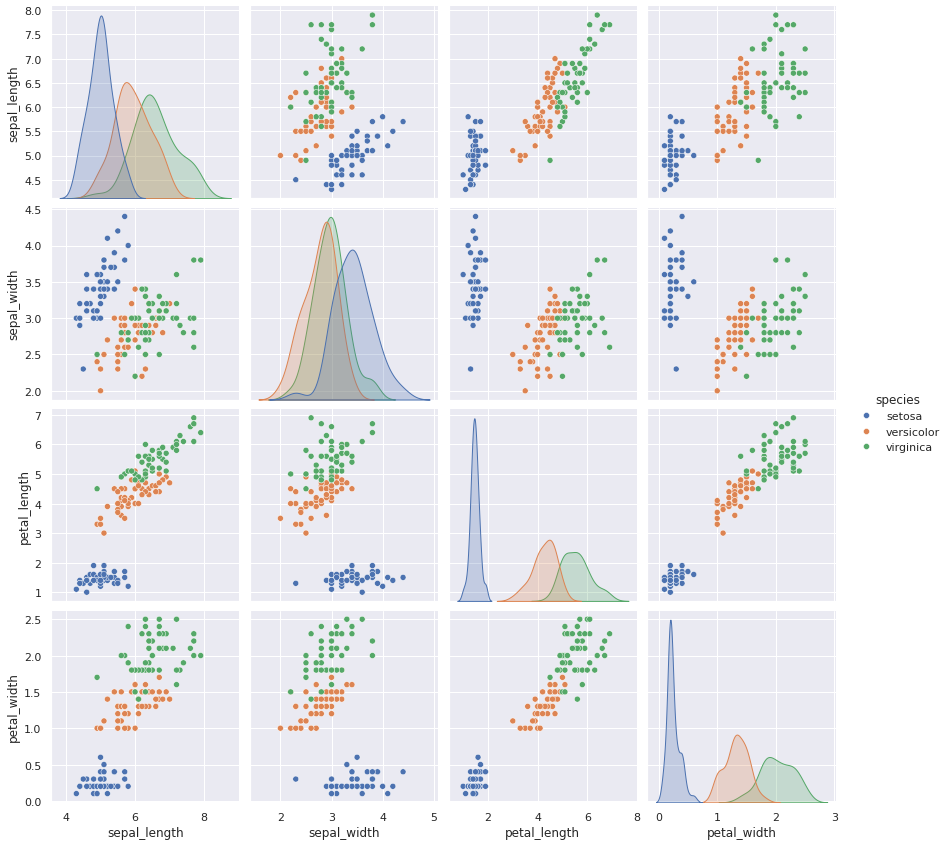

In [37]:
#Scatterplot EDA between sepal length, sepal width, petal width and petallength and how species are reacting to it.
scatterplot = sns.pairplot(iris_data_set, hue = 'species', height = 3, aspect = 1);

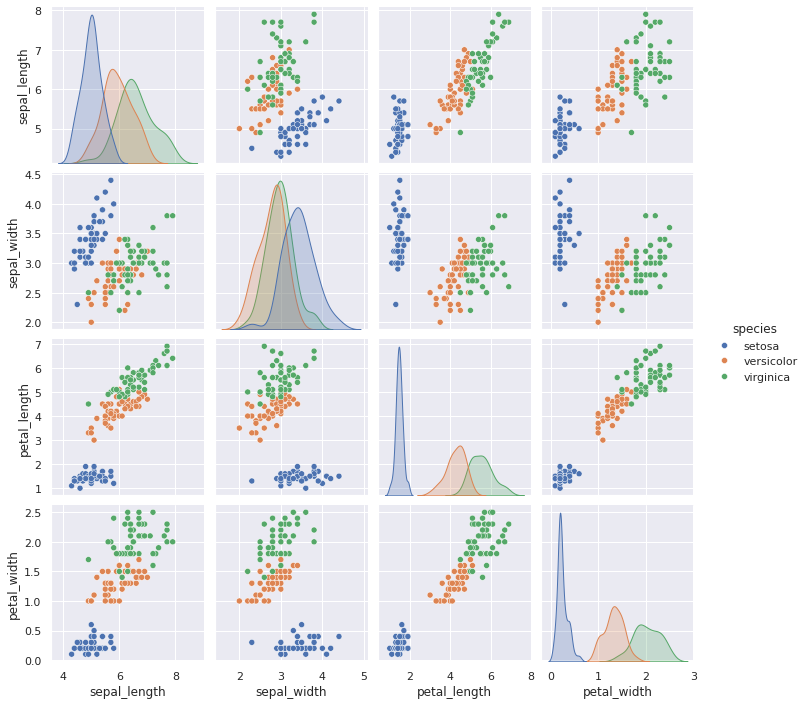

In [38]:
scatterplot = sns.pairplot(iris_data_set, hue = "species", diag_kind = "kde");

***

## <font color='blue'> Scikit-Learn </font> 

url = [http://scikit-learn.org/stable/](http://scikit-learn.org/stable/)

### <font color='blue'> Scikit-Learn API </font>

> Main Reference:

1. url = [https://arxiv.org/abs/1309.0238](https://arxiv.org/abs/1309.0238)

### <font color='blue'> General principles </font>

* **Consistency**. All objects (basic or composite) share a consistent interface composed of a limited set of methods. This interface is documented in a consistent manner for all objects. 

* **Inspection**. Constructor parameters and parameter values determined by learning algorithms are stored and exposed as public attributes. 

* **Non-proliferation of classes**. Learning algorithms are the only objects to be represented using custom classes. Datasets are represented as NumPy arrays or SciPy sparse matrices. Hyper-parameter names and values are represented as standard Python strings or numbers whenever possible. This keeps scikitlearn easy to use and easy to combine with other libraries. 

* **Composition**. Many machine learning tasks are expressible as sequences or combinations of transformations to data. Some learning algorithms are also naturally viewed as meta-algorithms parametrized on other algorithms. Whenever feasible, such algorithms are implemented and composed from existing building blocks. 

* **Sensible defaults**. Whenever an operation requires a user-deﬁned parameter, an appropriate default value is deﬁned by the library. The default value should cause the operation to be performed in a sensible way (giving a baseline solution for the task at hand).



### <font color='blue'> Basic Steps for Using Scikit-Learn API </font>

1. Choose a class of model.
2. Choose model hyperparameters.
3. Arrage data into features matrix and target array.
4. Fit model to data.
5. Apply trained model to new data.
6. View results and analyze.

### <font color='blue'> Key points </font>

* Data analysis in the form of a table (pandas).
* Features in the form of a matrix.
* Label or target array format.
* Application of Simple Linear Regression.

## <font color='blue'> Supervised Learning: Simple Linear Regression </font>

In [ ]:
generate_random = np.random.RandomState(0)
x = 10 * generate_random.rand(100)

In [ ]:
y = 3 * x + np.random.randn(100)

In [ ]:
plt.figure(figsize = (10, 8))
plt.scatter(x, y);

### <font color='blue'> Step 1. Choose a class of model </font> 

In [ ]:
from sklearn.linear_model import LinearRegression

### <font color='blue'> Step 2. Choose model hyperparameters </font>  

In [ ]:
model = LinearRegression(fit_intercept=True)

In [ ]:
model

### <font color='blue'> Step 3. Arrage data into features matrix and target array </font>

In [ ]:
X = x.reshape(-1, 1)
X.shape

### <font color='blue'> Step 4. Fit model to data </font>

In [ ]:
model.fit(X, y)

In [ ]:
model.coef_

In [ ]:
model.intercept_

### <font color='blue'> Step 5. Apply trained model to new data </font>

In [ ]:
x_fit = np.linspace(-1, 11)

In [ ]:
X_fit = x_fit.reshape(-1,1)

In [ ]:
y_fit = model.predict(X_fit)

### <font color='blue'> Visualise </font>

In [ ]:
plt.figure(figsize = (10, 8))
plt.scatter(x, y)
plt.plot(x_fit, y_fit);

***

## <font color='blue'> Iris: Simple Linear Regression </font>

*Form of linear regression*

$y = β_0 + β_1x_1 + β_2x_2 + ... + β_nx_n$
 
- $y$ is the response
- $β_0$ is the intercept
- $β_1$ is the coefficient for $x_1$ (the first feature)
- $β_n$ is the coefficient for $x_n$ (the nth feature)

The $β$ values are called the model coefficients:

These values are estimated (or "learned") during the model fitting process using the least squares criterion. Specifically, we are going to find the line (mathematically) which minimizes the sum of squared residuals (or "sum of squared errors"). And once we've learned these coefficients, we can use the model to predict the response.

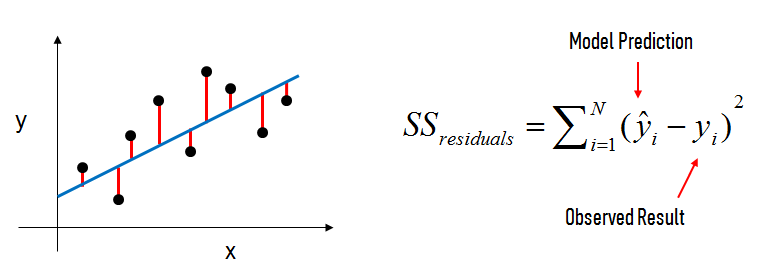

In the diagram above:

- The black dots are the observed values of $x$ and $y$.
- The blue line is our least squares line.
- The red lines are the residuals, which are the vertical distances between the observed values and the least squares line.

### <font color='blue'> Relationship between sepal width and sepal length </font>

In [55]:
input_cols = ['sepal_width']
output_variable = ['sepal_length']
X = iris_data_set[input_cols]
Y = iris_data_set[output_variable]

#Creating the Linear Regression Model
linreg = LinearRegression()
linreg.fit(X,Y)
print(linreg.intercept_)
print(linreg.coef_)
print('\n')
print(f'sepal_length = {linreg.coef_[0][0]}*sepal_width + {linreg.intercept_[0]}')
print('\n')
print(f'Holding constant fixed, a 1 centimeter increase in sepal width lead to a decrease in sepal length by {round(linreg.coef_[0][0], 3)} centimeter')

[6.52622255]
[[-0.22336106]]


sepal_length = -0.22336106112989965*sepal_width + 6.52622255089448


Holding constant fixed, a 1 centimeter increase in sepal width lead to a decrease in sepal length by -0.223 centimeter


### <font color='blue'> Relationship between petal length and sepal length </font>

In [56]:
input_cols = ['petal_length']
output_variable = ['sepal_length']
X = iris_data_set[input_cols]
Y = iris_data_set[output_variable]

#Creating the Linear Regression Model
linreg = LinearRegression()
linreg.fit(X,Y)
print (linreg.intercept_)
print (linreg.coef_)
print('\n')
print(f'sepal_length = {linreg.coef_[0][0]}*petal_length + {linreg.intercept_[0]}')
print('\n')
print(f'Holding constant fixed, a 1 centimeter increase in petal length lead to a decrease in sepal length by {round(linreg.coef_[0][0], 3)} centimeter')

[4.30660342]
[[0.40892228]]


sepal_length = 0.40892227735118536*petal_length + 4.306603415047579


Holding constant fixed, a 1 centimeter increase in petal length lead to a decrease in sepal length by 0.409 centimeter


### <font color='blue'> Relationship between petal width and sepal length </font>

In [57]:
input_cols = ['petal_width']
output_variable = ['sepal_length']
X = iris_data_set[input_cols]
Y = iris_data_set[output_variable]

#Creating the Linear Regression Model
linreg = LinearRegression()
linreg.fit(X,Y)
print (linreg.intercept_)
print (linreg.coef_)
print('\n')
print(f'sepal_length = {linreg.coef_[0][0]}*petal_width + {linreg.intercept_[0]}')
print('\n')
print(f'Holding constant fixed, a 1 centimeter increase in petal width lead to a decrease in sepal length by {round(linreg.coef_[0][0], 3)} centimeter')

[4.77762942]
[[0.88858025]]


sepal_length = 0.8885802538063642*petal_width + 4.7776294156015675


Holding constant fixed, a 1 centimeter increase in petal width lead to a decrease in sepal length by 0.889 centimeter


### <font color='blue'> Multivariate model with petal width, petal length and sepal length </font>

In [60]:
input_cols = ['petal_width', 'petal_length', 'sepal_width']
output_variable = ['sepal_length']
X = iris_data_set[input_cols]
Y = iris_data_set[output_variable]

#Creating the Linear Regression Model
linreg = LinearRegression()
linreg.fit(X,Y)
print (linreg.intercept_)
print (linreg.coef_)

print('\n')
print(f'sepal_length = {linreg.coef_[0][0]}*petal_width + {linreg.coef_[0][1]}*petal_length + {linreg.coef_[0][2]}*sepal_width + {linreg.intercept_[0]}')
print('\n')

print(f'Holding all other independent variable fixed, a 1 centimeter decrease in petal width lead to a decrease in sepal length by {round(linreg.coef_[0][0], 3)} cm')
print(f'Holding all other independent variable fixed, a 1 centimeter increase in petal length lead to a increase in sepal length by {round(linreg.coef_[0][1], 3)} cm')
print(f'Holding all other independent variable fixed, a 1 centimeter increase in sepal width lead to a increase in sepal length by {round(linreg.coef_[0][2], 3)} cm')
print('\n')

[1.85599749]
[[-0.55648266  0.70913196  0.65083716]]


sepal_length = -0.5564826601670242*petal_width + 0.7091319591367291*petal_length + 0.6508371593132182*sepal_width + 1.8559974929175445


Holding all other independent variable fixed, a 1 centimeter decrease in petal width lead to a decrease in sepal length by -0.556 cm
Holding all other independent variable fixed, a 1 centimeter increase in petal length lead to a increase in sepal length by 0.709 cm
Holding all other independent variable fixed, a 1 centimeter increase in sepal width lead to a increase in sepal length by 0.651 cm




In given mutivariate model, the petal width is showing a negative relation with sepal length, which proves a level of correlation or dependency between petal length and petal width. This is proved by the correlation matrix as well. Therefore, we have a multicollinearity issue with this model and need to drop one of them.

### <font color='blue'> Multivariate model with sepal length, sepal width, petal length </font>

In [61]:
input_cols = ['petal_length','sepal_width']
output_variable = ['sepal_length']
X = iris_data_set[input_cols]
Y = iris_data_set[output_variable]

#Creating the Linear Regression Model
linreg = LinearRegression()
linreg.fit(X,Y)
print (linreg.intercept_)
print (linreg.coef_)
print('\n')
print(f'sepal_length = {linreg.coef_[0][0]}*petal_length + {linreg.coef_[0][1]}*sepal_width + {linreg.intercept_[0]}')
print('\n')

print(f'Holding all other independent variable fixed, a 1 centimeter increase in petal length lead to a increase in sepal length by {round(linreg.coef_[0][0], 3)} cm')
print(f'Holding all other independent variable fixed, a 1 centimeter increase in sepal width lead to a increase in sepal length by {round(linreg.coef_[0][1], 3)} cm')

[2.24914016]
[[0.47192004 0.59552475]]


sepal_length = 0.4719200393271331*petal_length + 0.5955247487435907*sepal_width + 2.249140160383229


Holding all other independent variable fixed, a 1 centimeter increase in petal length lead to a increase in sepal length by 0.472 cm
Holding all other independent variable fixed, a 1 centimeter increase in sepal width lead to a increase in sepal length by 0.596 cm


### <font color='blue'> Multivariate model with sepal length, sepal width, petal width </font>

In [63]:
input_cols = ['petal_width', 'sepal_width']
output_variable = ['sepal_length']
X = iris_data_set[input_cols]
Y = iris_data_set[output_variable]

#Creating the Linear Regression Model
linreg = LinearRegression()
linreg.fit(X,Y)
print (linreg.intercept_)
print (linreg.coef_)

print('\n')
print(f'sepal_length = {linreg.coef_[0][0]}*petal_width + {linreg.coef_[0][1]}*sepal_width + {linreg.intercept_[0]}')
print('\n')

print(f'Holding all other independent variable fixed, a 1 centimeter increase in petal width lead to a increase in sepal length by {round(linreg.coef_[0][0], 3)} centimeter')
print(f'Holding all other independent variable fixed, a 1 centimeter increase in sepal width lead to a increase in sepal length by {round(linreg.coef_[0][1], 3)} centimeter')

[3.45733341]
[[0.97212965 0.39907079]]


sepal_length = 0.9721296476019097*petal_width + 0.3990707918805416*sepal_width + 3.457333408266667


Holding all other independent variable fixed, a 1 centimeter increase in petal width lead to a increase in sepal length by 0.972 centimeter
Holding all other independent variable fixed, a 1 centimeter increase in sepal width lead to a increase in sepal length by 0.399 centimeter


### <font color='blue'> Multicollinearity through determinant value </font>

In [85]:
import numpy as np
input_cols = ['petal_width', 'petal_length', 'sepal_width']
output_variable = ['sepal_length']
X = iris_data_set[input_cols]
Y = iris_data_set[output_variable]

corr = np.corrcoef(X, rowvar = 0)

print(corr)

print('\n')
print (np.linalg.det(corr))
print('\n')

print(f'1. Determinant value for petal width, petal length and sepal width = {round(np.linalg.det(corr), 3)}.')

[[ 1.          0.96286543 -0.36612593]
 [ 0.96286543  1.         -0.4284401 ]
 [-0.36612593 -0.4284401   1.        ]]


0.05735702290426796


1. Determinant value for petal width, petal length and sepal width = 0.057.


- Petal length and petal width are highly correlated $\approx 96 \%$ and lead to multicollinearity.
- Run the input variable in different combination to find the determinant value. The deteminant of correlation matrix is $0 \leq D \leq 1$.
- $D = 0$, then it indicates exact interdependence of expalanatory variable. $D = 1$, then expalanatory variable independent to each other and have no multicollinearity issue.

In [87]:
import numpy as np
input_cols = ['petal_length', 'sepal_width']
output_variable = ['sepal_length']
X = iris_data_set[input_cols]
Y = iris_data_set[output_variable]

corr = np.corrcoef(X, rowvar = 0)

print(corr)

print('\n')
print (np.linalg.det(corr))
print('\n')

print(f'2. Determinant value for petal length, sepal width = {round(np.linalg.det(corr), 3)}.')

[[ 1.        -0.4284401]
 [-0.4284401  1.       ]]


0.8164390770012363


2. Determinant value for petal length, sepal width = 0.816.


In [88]:
import numpy as np
input_cols = ['petal_width', 'sepal_width']
output_variable = ['sepal_length']
X = iris_data_set[input_cols]
Y = iris_data_set[output_variable]

corr = np.corrcoef(X, rowvar = 0)

print(corr)

print('\n')
print (np.linalg.det(corr))
print('\n')

print(f'3. Determinant value for petal width, sepal width = {round(np.linalg.det(corr), 3)}.')

[[ 1.         -0.36612593]
 [-0.36612593  1.        ]]


0.8659518015243226


2. Determinant value for petal width, sepal width = 0.866.


In [89]:
import numpy as np
input_cols = ['petal_width', 'petal_length']
output_variable = ['sepal_length']
X = iris_data_set[input_cols]
Y = iris_data_set[output_variable]

corr = np.corrcoef(X, rowvar = 0)

print(corr)

print('\n')
print (np.linalg.det(corr))
print('\n')

print(f'4. Determinant value for petal width, petal length = {round(np.linalg.det(corr), 3)}.')

[[1.         0.96286543]
 [0.96286543 1.        ]]


0.07289016100950695


4. Determinant value for petal width, petal length = 0.073.


- We will avoid the model $1$ and $4$, as the value of $D$ is close to $0$, which indicates the multicollinearity issue. Whereas model $2$ and $3$ are acceptable, as the value of $D$ is close to $1$ and independent variables are not dependent to each other.
- In general, when threshold level is $D > 0.7$, then we can take all the input variables in the model. If $D < 0.4$, then we can say that there is lot of interdependency between variables and we need to drop those variables which are highly correlated and causing multicollinearity.

## <font color='blue'> Choosing between models </font>

- Feature selection: How do we choose which features to include in the model? We're going to use train/test split (and eventually cross-validation). Why not use of p-values or R-squared for feature selection? Linear models rely upon a lot of assumptions (such as the features being independent), and if those assumptions are violated, p-values and R-squared are less reliable. Train/test split relies on fewer assumptions. Features that are unrelated to the response can still have significant p-values. Adding features to your model that are unrelated to the response will always increase the R-squared value, and adjusted R-squared does not sufficiently account for this. p-values and R-squared are proxies for our goal of generalization, whereas train/test split and cross-validation attempt to directly estimate how well the model will generalize to out-of-sample data. More generally: There are different methodologies that can be used for solving any given data science problem, and this part follows a machine learning methodology. The focuse is on general purpose approaches that can be applied to any model, rather than model-specific approaches.

- Evaluation metrics for regression problems: Evaluation metrics for classification problems, such as accuracy, are not useful for regression problems. We need evaluation metrics designed for comparing continuous values. Here are three common evaluation metrics for regression problems: 

1. **Mean Absolute Error (MAE):** is the mean of the absolute value of the errors.

$\quad$ Characteristics: 

- Neutral to outliers. 
- Error is in same units as that of the data points.

$\qquad \qquad \frac{1}{n}\sum\limits_{i = 1}^{n}{|y_{i}−\hat{y}_{i}|}$
 
2. **Mean Squared Error (MSE):** is the mean of the squared errors.

$\quad$ Characteristics:

- Accounts impact of outliers.
- Error is NOT in same unit as that of the data points .

$\qquad \qquad \frac{1}{n}\sum\limits_{i = 1}^{n}{(y_{i}−\hat{y}_{i})^{2}}$
 
2. **Root Mean Squared Error (RMSE):** is the square root of the mean of the squared errors.

$\quad$ Characteristics: 

- Accounts impact of outliers.
- Error is in same unit as that of the data points.

$\qquad \qquad \sqrt{\frac{1}{n}\sum\limits_{i = 1}^{n}{(y_{i}−\hat{y}_{i})^{2}}}$
 
- Only in training dataset, the best fit line is formed to minimize the  sum of squared estimate of errors (SSE), not in the test data. We use RMSE in test data to evaluate how good is the model. In other words, SSE is for the best fit line and RMSE for the best model.

In [93]:
input_cols = ['petal_length', 'sepal_width']
output_variable = ['sepal_length']
X = iris_data_set[input_cols]
y = iris_data_set[output_variable]
y = iris_data_set['sepal_length']

- We are going to create our model, train it to fit 70% of the data and then test our model with the remaining 30% of the data.

In [94]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.3, random_state = 12)

In [95]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(105, 2)
(105,)
(45, 2)
(45,)


### <font color='blue'> Buliding the Linear model with the algorithm </font>

In [96]:
lin_reg = LinearRegression()
model = lin_reg.fit(X_train, y_train)

In [104]:
# Coefficient of determination or R squared value  
# input_cols = ['petal_length', 'sepal_width']

print ('R-Squared for training dataset model:', model.score(X_train, y_train))

print('\n')

print(f'The high R-Squared value {round(model.score(X_train, y_train), 3)} from petal length and sepal width, implies that petal length and sepal width \
can be relied to explain {round(model.score(X_train, y_train)*100, 2)}% of the variations in sepal length.')

print('\n')

R-Squared for training dataset model: 0.8342212724383091


The high R-Squared value 0.834 from petal length and sepal width, implies that petal length and sepal width can be relied to explain 83.42% of the variations in sepal length.




- R-squared, measure how close the data are fitted to the regression line. It lies between $0$ to $1$. $0$ indicates that the model explains none of the variability of the response data around its mean. $1$ indicates that the model explains all the variability of the response data around its mean. In general, the higher the R-squared, the better the model fits your data. But, its not always true that a Low or high R-squared values Inherently bad or good?
- R-squared will give you an estimate of the relationship between movements of a dependent variable based on an independent variable’s movements. However, it doesn’t tell you whether your chosen model is good or bad, nor will it tell you whether the data and predictions are biased. A high or low R-squared isn’t necessarily good or bad—it doesn’t convey the reliability of the model or whether you’ve chosen the right regression. You can get a low R-squared for a good model, or a high R-squared for a poorly fitted model, and vice versa.

In [107]:
# input_cols = ['petal_length', 'sepal_width']
# output_variable = ['sepal_length']

print(model.intercept_)
print(model.coef_)

2.2048617631970933
[0.47590709 0.60039883]


- **Predicting the x_test with the model**

In [108]:
predicted = model.predict(X_test)

In [109]:
# Input variable petal length and sepal width

print ('MAE:', metrics.mean_absolute_error(y_test, predicted))
print ('MSE:', metrics.mean_squared_error(y_test, predicted))
print ('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predicted)))

MAE: 0.2445825547323105
MSE: 0.09470106044699889
RMSE: 0.30773537405862017


- **The accuracy of model**

In [114]:
iris_data_set['sepal_length'].describe()

count   150.00
mean      5.84
std       0.83
min       4.30
25%       5.10
50%       5.80
75%       6.40
max       7.90
Name: sepal_length, dtype: float64

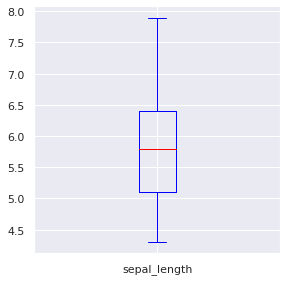

In [111]:
boxplot = iris_data_set['sepal_length'].plot(kind = 'box', subplots = True, layout = (2, 3), sharex = False, sharey = False, colormap = 'bwr', figsize = (15,10))

- We look at the boxplot for sepal length, the IQ range is between (5.1 to 6.4 cm). So most of the values lies between ($5.1$ to $6.4$ cm) with in $1.3$ cm. Therefore, the output will fall with in the variation range of $+/- 0.307$ cm. We can say that the model is a good fit because the RMSE value is $<$ than the null RMSE value.

- **R Squared value or coefficient of determination**

In [115]:
print(metrics.r2_score(y_test,predicted))

0.8441454703966282


- **Compute null RMSE**

In [116]:
# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 12)

# create a NumPy array with the same shape as y_test
y_null = np.zeros_like(y_test, dtype = float)

# fill the array with the mean value of y_test
y_null.fill(y_test.mean())
y_null

array([5.67555556, 5.67555556, 5.67555556, 5.67555556, 5.67555556,
       5.67555556, 5.67555556, 5.67555556, 5.67555556, 5.67555556,
       5.67555556, 5.67555556, 5.67555556, 5.67555556, 5.67555556,
       5.67555556, 5.67555556, 5.67555556, 5.67555556, 5.67555556,
       5.67555556, 5.67555556, 5.67555556, 5.67555556, 5.67555556,
       5.67555556, 5.67555556, 5.67555556, 5.67555556, 5.67555556,
       5.67555556, 5.67555556, 5.67555556, 5.67555556, 5.67555556,
       5.67555556, 5.67555556, 5.67555556, 5.67555556, 5.67555556,
       5.67555556, 5.67555556, 5.67555556, 5.67555556, 5.67555556])

- When we don't have the input variable, we are taking mean and calculating null RMSE. Null RMSE is the RMSE that could be achieved by always predicting the mean response value. It is a benchmark against which you may want to measure your regression model.

In [117]:
print(y_test.shape)
print(y_null.shape)

(45,)
(45,)


- **Compute null RMSE**

In [119]:
np.sqrt(metrics.mean_squared_error(y_test, y_null))

0.7795028488453553

- We have to ensure that our machine learning model RMSE value is lower than the manually computed RMSE value. If its not than our model is not effective and we better be okay with using central tendency method.

In [120]:
feature_cols = ['petal_width', 'petal_length', 'sepal_width']

- **Function that accepts a list of features and returns testing RMSE**

In [191]:
def train_test_rmse(df, feature_cols):
    X = df[feature_cols]
    y = df['sepal_length']
    X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3, random_state = 12)
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    y_pred = linreg.predict(X_test)
    return np.sqrt(metrics.mean_squared_error(y_test, y_pred))

- **Compare different sets of features**

In [192]:
print(train_test_rmse(iris_data_set, ['petal_width','petal_length', 'sepal_width']))
print(train_test_rmse(iris_data_set, ['petal_width', 'sepal_width']))
print(train_test_rmse(iris_data_set, ['petal_length', 'sepal_width']))

0.32394997134367254
0.3733221617323694
0.30773537405862017


- **Function that accepts a list of features and returns testing MSE**

In [193]:
def train_test_mse(df, feature_cols):
    X = df[feature_cols]
    y = df['sepal_length']
    X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3,random_state = 12)
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    y_pred = linreg.predict(X_test)
    return metrics.mean_squared_error(y_test, y_pred)

- **Compare different sets of features**

In [194]:
print(train_test_mse(iris_data_set, ['petal_width','petal_length', 'sepal_width']))
print(train_test_mse(iris_data_set, ['petal_width', 'sepal_width']))
print(train_test_mse(iris_data_set, ['petal_length', 'sepal_width']))

0.10494358393356625
0.13936943644052938
0.09470106044699889


- **Function that accepts a list of features and returns testing MAE**

In [195]:
def train_test_mae(df, feature_cols):
    X = df[feature_cols]
    y = df['sepal_length']
    X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3, random_state = 12)
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    y_pred = linreg.predict(X_test)
    return metrics.mean_absolute_error(y_test, y_pred)

- **Compare different sets of features**

In [196]:
print(train_test_mae(iris_data_set, ['petal_width','petal_length', 'sepal_width']))
print(train_test_mae(iris_data_set, ['petal_width', 'sepal_width']))
print(train_test_mae(iris_data_set, ['petal_length', 'sepal_width']))

0.25697411474405524
0.2865405402674447
0.2445825547323105


In [197]:
iris_data_set.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.10,3.50,1.40,0.20,setosa
1,4.90,3.00,1.40,0.20,setosa
2,4.70,3.20,1.30,0.20,setosa
3,4.60,3.10,1.50,0.20,setosa
4,5.00,3.60,1.40,0.20,setosa


- **Create dummy variables**

In [198]:
species_dummies = pd.get_dummies(iris_data_set.species, prefix = 'species')

# print 5 random rows from seed value 12
species_dummies.sample(n = 5, random_state = 12)

,species_setosa,species_versicolor,species_virginica
40,1,0,0
146,0,0,1
38,1,0,0
99,0,1,0
143,0,0,1


In [199]:
species_dummies.drop(species_dummies.columns[0], axis = 1, inplace = True) # drop 'species_setosa'
iris_data = pd.concat([iris_data_set, species_dummies], axis=1)
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_versicolor,species_virginica
0,5.10,3.50,1.40,0.20,setosa,0,0
1,4.90,3.00,1.40,0.20,setosa,0,0
2,4.70,3.20,1.30,0.20,setosa,0,0
3,4.60,3.10,1.50,0.20,setosa,0,0
4,5.00,3.60,1.40,0.20,setosa,0,0


In [200]:
iris_data.sample(n = 5, random_state = 12)

,sepal_length,sepal_width,petal_length,petal_width,species,species_versicolor,species_virginica
40,5.00,3.50,1.30,0.30,setosa,0,0
146,6.30,2.50,5.00,1.90,virginica,0,1
38,4.40,3.00,1.30,0.20,setosa,0,0
99,5.70,2.80,4.10,1.30,versicolor,1,0
143,6.80,3.20,5.90,2.30,virginica,0,1


In [201]:
iris_data.corr()

,sepal_length,sepal_width,petal_length,petal_width,species_versicolor,species_virginica
sepal_length,1.00,-0.12,0.87,0.82,0.08,0.64
sepal_width,-0.12,1.00,-0.43,-0.37,-0.47,-0.14
petal_length,0.87,-0.43,1.00,0.96,0.20,0.72
petal_width,0.82,-0.37,0.96,1.00,0.12,0.77
species_versicolor,0.08,-0.47,0.20,0.12,1.00,-0.50
species_virginica,0.64,-0.14,0.72,0.77,-0.50,1.00


- We can see that species versicolor and virginica are negatively and moderately correlated to each other. Whereas versicolor is weakly correlated to other variables, therefore exist a minimal impact on it with variations in other variables.
- However, virginica having a effective positive correlation with petal length and width and weak negative correlation with sepal width.
- But it shows that a 64% changes in sepal length can be explained by the variation in independent variable of virginca species 

- **Predicting the value of sepal length**

We are going to create our model, train it to fit 70% of the data and then test our model with the remaining 30% of the data.

In [155]:
feature_dummies1 =['petal_length', 'sepal_width', 'species_versicolor', 'species_virginica']

# create X and y
X = iris_data[feature_dummies1]
y = iris_data['sepal_length']

# instantiate and fit
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 12)
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)

# print the coefficients
print ('Intercept: ', linreg.intercept_)
print('\n')
print ('coefficients: ', list(zip(feature_dummies1, linreg.coef_)))
#print (linreg.coef_)

print('\n')

# the predicted value of sepal length
print('Predicted value of sepal length: \n \n', y_pred)

Intercept:  2.584751256620116


coefficients:  [('petal_length', 0.8600986685451145), ('sepal_width', 0.3357377647357218), ('species_versicolor', -1.2610221443997713), ('species_virginica', -1.7880046002024352)]


Predicted value of sepal length: 
 
 [4.8779617  5.93658441 4.71009282 5.79019939 6.94568965 6.53450263
 6.58278787 5.01640766 7.05056183 5.15485362 6.20138641 5.01225681
 5.01640766 5.11712899 6.4405537  7.03169951 6.62466335 5.94335681
 4.93039779 6.377557   4.79610269 5.70418953 5.86528601 6.16781264
 5.36044713 6.27647303 6.63143575 5.98108144 5.10241753 4.47507638
 4.96397157 5.31186482 6.58693872 5.198988   6.08974183 5.35214542
 5.39372384 5.39787469 4.95982072 5.50274687 4.74336953 5.10241753
 4.76252891 5.15070277 4.79610269]


**Interpreting the species coefficients.**

- They are measured against the baseline or reference category (Setosa): 
- Holding all other features fixed, versicolor is associated with a decrease of 1.26cm in sepal length compared to the Setosa.
- Holding all other features fixed, virginica is associated with a decrease of 1.79cm in sepal length compared to the Setosa.

In [156]:
feature_dummies2 =['petal_width','sepal_width', 'species_versicolor', 'species_virginica']

# create X and y
X = iris_data[feature_dummies2]
y = iris_data['sepal_length']

# instantiate and fit
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3, random_state = 12)
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)

# print the coefficients
print ('Intercept: ', linreg.intercept_)
print('\n')
print ('coefficients: ', list(zip(feature_dummies2, linreg.coef_)))
#print (linreg.coef_)

print('\n')

# the predicted value of sepal length

print('Predicted value of sepal length: \n \n', y_pred)

Intercept:  2.291625882995569


coefficients:  [('petal_width', 0.2920786150959265), ('sepal_width', 0.7719366307365834), ('species_versicolor', 1.1218238468384811), ('species_virginica', 1.398311253980869)]


Predicted value of sepal length: 
 
 [5.08102768 6.17472808 4.6658515  5.9545745  6.83191517 6.53148854
 6.9863025  4.97462615 6.67752784 4.98505607 6.16737754 5.41901019
 5.03304187 5.26462286 6.29255701 6.68587586 6.14552022 6.16737754
 5.00383401 5.78140923 4.6658515  5.9545745  6.37710121 6.09018388
 4.97462615 6.67752784 6.22579327 5.77097931 4.97462615 4.15470372
 5.08102768 5.55817626 6.45429487 5.59217546 6.32911541 5.8049785
 6.03176816 5.58738412 5.43778813 5.40378893 5.66457778 5.03304187
 4.58865784 5.31260866 4.63664364]


In [158]:
feature_dummies3 =['petal_length', 'petal_width', 'sepal_width', 'species_versicolor', 'species_virginica']

# create X and y
X = iris_data[feature_dummies3]
y = iris_data['sepal_length']

# instantiate and fit
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3, random_state = 12)
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)

# print the coefficients
print ('Intercept: ', linreg.intercept_)
print('\n')
print ('coefficients: ', list(zip(feature_dummies3, linreg.coef_)))
#print (linreg.coef_)

print('\n')

# the predicted value of sepal length

print('Predicted value of sepal length: \n \n', y_pred)

print('\n')

print('This model is not effective due to multicollinearity between the independent variables, petal length and width.')

Intercept:  2.266439727739618


coefficients:  [('petal_length', 0.9212783363307794), ('petal_width', -0.3899837087020839), ('sepal_width', 0.4277507692360085), ('species_versicolor', -0.9429067639696269), ('species_virginica', -1.2923092448412852)]


Predicted value of sepal length: 
 
 [4.84423414 5.90893004 4.66935713 5.79149748 6.8815126  6.62244296
 6.50642358 5.02471311 6.98021811 5.04919858 6.16756222 4.97633608
 4.94671636 5.07504159 6.47636641 7.16863229 6.68495108 5.89117872
 4.8935869  6.32219817 4.76148496 5.69936964 5.89199798 6.12478714
 5.39322444 6.15106761 6.55020465 6.02132919 5.11684094 4.33093322
 4.93636198 5.36888095 6.67179572 5.27478589 6.08660803 5.37446713
 5.37363338 5.42201041 5.00498007 5.55971429 4.72776282 5.0388442
 4.71870989 5.15681504 4.80048334]


This model is not effective due to multicollinearity between the independent variables, petal length and width.


- **Calculating rmse value**

In [203]:
print(train_test_rmse(iris_data, ['petal_length', 'species_versicolor', 'species_virginica', 'sepal_width']))
print(train_test_rmse(iris_data, iris_data.columns[iris_data.columns.str.startswith('species_')]))
print(train_test_rmse(iris_data, ['petal_width', 'species_versicolor', 'species_virginica', 'sepal_width']))

0.32708898225834665
0.4534843521508058
0.36337221745652515


We can see among the calculated rmse value, the least rmse value is for the petal length, species_versicolor, species_virginica and sepal width; it is better than other rmse value. So, model #1 it is a best model to consider.

- **Conclusion**

- In statistical modeling, regression analysis is a set of statistical processes for estimating the relationships among variables. 
- It includes many techniques for modeling and analyzing several variables, when the focus is on the relationship between a dependent variable and one or more independent variables (or 'predictors').
- Specifically, regression analysis helps one understand how the typical value of the dependent variable (or 'criterion variable') changes when any one of the independent variables is varied, while the other independent variables are held fixed.

- **Rerenece**

1. Massaron, L. & Boschetti, A. (2016) Regression Analysis with Python. Packt Publishing.
2. Arkes, J. (2023). Regression Analysis: A Practical Introduction. Routledge